In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sys import platform
from scr import cleaning
from scr import models
from scr import bestmodel
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
from scr import cleaning

In [3]:
#Loading dataset 
df_train,df_test = cleaning.import_data()

## 1. Data exploration 

`df_train`

In [4]:
print(cleaning.exploration(df_train))

<bound method DataFrame.info of           id  carat        cut color clarity  depth  table     x     y     z  \
0          0   1.02       Good     D     VS2   63.2   58.0  6.36  6.40  4.03   
1          1   0.35  Very Good     H    VVS2   61.0   57.0  4.54  4.57  2.77   
2          2   0.31    Premium     H    VVS1   60.5   58.0  4.43  4.40  2.67   
3          3   0.38      Ideal     E     VS1   61.4   56.0  4.66  4.69  2.87   
4          4   1.64      Ideal     G    VVS2   61.8   56.0  7.59  7.60  4.69   
...      ...    ...        ...   ...     ...    ...    ...   ...   ...   ...   
40450  40450   1.20      Ideal     G    VVS2   62.2   55.0  6.77  6.81  4.23   
40451  40451   1.50       Good     H     VS1   64.2   56.0  7.30  7.09  4.62   
40452  40452   1.06      Ideal     E     VS2   61.9   55.0  6.54  6.58  4.06   
40453  40453   0.31    Premium     D     SI2   60.1   58.0  4.40  4.38  2.64   
40454  40454   2.00  Very Good     J     SI1   60.8   58.0  7.99  8.07  4.88   

       

In [5]:
df_train = cleaning.cleaning(df_train)
df_train = df_train.drop("id", axis=1)
df_train

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.02,4,1,6,0.561111,0.288462,0.592179,0.201258,0.126730,8.928
1,0.35,3,5,4,0.500000,0.269231,0.422719,0.143711,0.087107,6.477
2,0.31,2,5,3,0.486111,0.288462,0.412477,0.138365,0.083962,6.810
3,0.38,1,2,5,0.511111,0.250000,0.433892,0.147484,0.090252,6.824
4,1.64,1,4,4,0.522222,0.250000,0.706704,0.238994,0.147484,9.776
...,...,...,...,...,...,...,...,...,...,...
40450,1.20,1,4,4,0.533333,0.230769,0.630354,0.214151,0.133019,9.149
40451,1.50,4,5,5,0.588889,0.250000,0.679702,0.222956,0.145283,9.077
40452,1.06,1,2,6,0.525000,0.230769,0.608939,0.206918,0.127673,8.892
40453,0.31,2,1,8,0.475000,0.288462,0.409683,0.137736,0.083019,6.385


`Heatmap: Which are the most correlated columns?`

<Axes: >

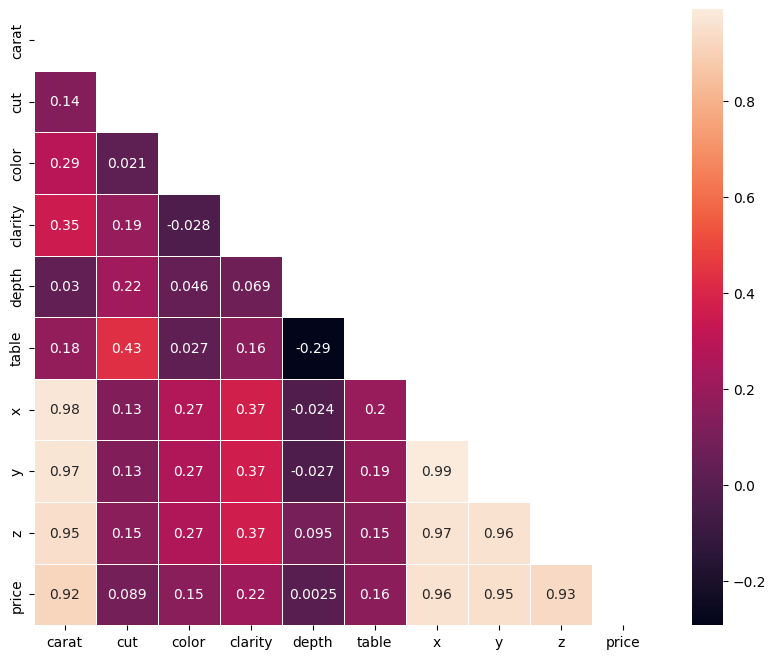

In [6]:
plt.figure(figsize=(10, 8))
train_corr = df_train.corr()
mask = np.triu(np.ones_like(df_train.corr()), k=0)
sns.heatmap(train_corr, annot= True, mask=mask, linewidths=0.5)

`Dropping columns with high relationship`

In [7]:
df_train = df_train.drop(columns= ["x", "y", "z"])

<Axes: >

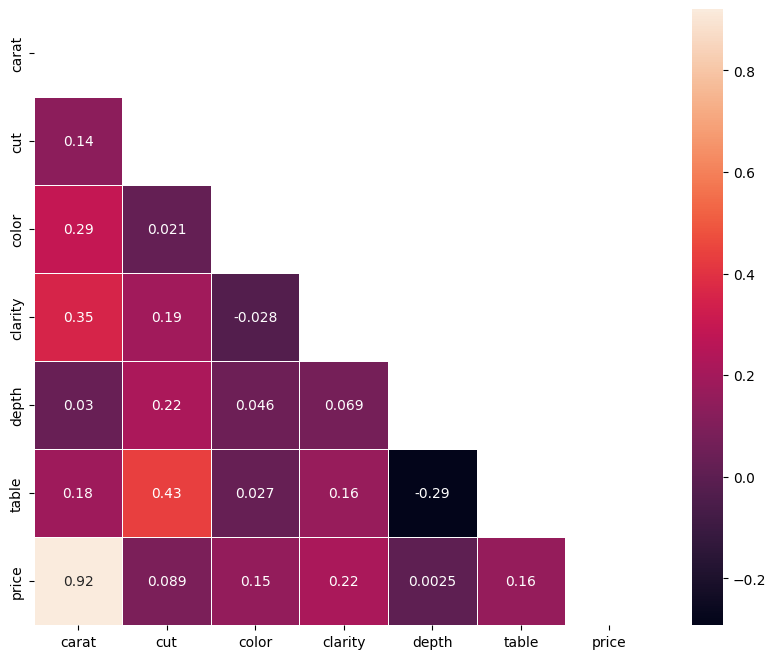

In [8]:
plt.figure(figsize=(10, 8))
train_2corr = df_train.corr()
mask1 = np.triu(np.ones_like(df_train.corr()), k=0)
sns.heatmap(train_2corr, annot= True, mask=mask1, linewidths=0.5)

In [9]:
X = df_train.iloc[:,:-1]
y = df_train['price']

`80:20 dataset split`

In [10]:
X_train, X_test, y_train, y_test = models.split_65(X,y)

In [11]:
models.training(X_train, y_train)

Training: LinReg
{'carat': 2.1768175044206437, 'cut': -0.0213058113325149, 'color': -0.08690265295723233, 'clarity': -0.08930619873062597, 'depth': -0.14256180559751194, 'table': 0.23386303162072533}
Training: LinRidge
{'carat': 2.17638919806453, 'cut': -0.021230562145042185, 'color': -0.08686467999097565, 'clarity': -0.08925268872327304, 'depth': -0.14116232204357276, 'table': 0.22916522701192973}
Training: LinLasso
{'carat': 0.0, 'cut': 0.0, 'color': 0.0, 'clarity': 0.0, 'depth': 0.0, 'table': 0.0}
Training: SGD
{'carat': 2.167098746733189, 'cut': -0.06745579058064265, 'color': -0.0934388797636041, 'clarity': -0.08796095963936593, 'depth': 2.275634134376805, 'table': 1.3025007235750927}
Training: knn
Feature ranking not available for knn
Training: grad
{'carat': 0.9553561755304166, 'cut': 0.0019084847818905733, 'color': 0.012638444762096992, 'clarity': 0.02974170906518456, 'depth': 0.00034354747189686407, 'table': 1.1638388514539797e-05}
Training: svr
Feature ranking not available fo

In [12]:
models.assess_models(X_test, y_test)

------------LinReg------------

MAE, error: 0.27726268001144777
MSE, error: 0.12454587017987903
RMSE, error: 0.3529105696630225
r2: 0.8788479618473067


------------LinRidge------------

MAE, error: 0.2772908653140413
MSE, error: 0.12454112110085527
RMSE, error: 0.35290384115344403
r2: 0.8788525815155643


------------LinLasso------------

MAE, error: 0.8768335124988854
MSE, error: 1.0280725836323774
RMSE, error: 1.013939141976666
r2: -5.796014013315087e-05


------------SGD------------

MAE, error: 0.28777218862066056
MSE, error: 0.13233629221336676
RMSE, error: 0.36378055502372136
r2: 0.8712698261286069


------------knn------------

MAE, error: 0.09720956214689265
MSE, error: 0.021062635793785308
RMSE, error: 0.14512972057364856
r2: 0.9795113137705853


------------grad------------

MAE, error: 0.08310551914546332
MSE, error: 0.011425358579873097
RMSE, error: 0.10688946898489625
r2: 0.9888859785027171


------------svr------------

MAE, error: 0.11019837914642838
MSE, error: 0.01940

`Best model performing: GradientBoostingRegressor()` with a correlation coefficient (r2) of 0.9889

Use `GridSearch` to obtain the best combination

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

#Hyperparameter tuning
gradient_param = {
    'max_depth': [10, 15, 20], 
    'n_estimators': [100, 200, 500]}

gradientgrid = GridSearchCV(GradientBoostingRegressor(random_state=79), gradient_param)
gradientgrid.fit(X_train, y_train)
print(gradientgrid.best_params_)
print('Best score: ', gradientgrid.best_score_)

{'max_depth': 10, 'n_estimators': 100}
Best score:  0.989368732476386


`Second best model performing: RandomForestRegressor()` with a correlation coefficient (r2) of 0.9885

Use `GridSearch` to obtain the best combination

In [14]:
#Hyperparameter tuning
randforest_param = {
    'max_depth': [10, 15, 20], 
    'n_estimators': [100, 200, 500]}

forestgrid = GridSearchCV(RandomForestRegressor(random_state=79), randforest_param)
forestgrid.fit(X_train, y_train)
print(forestgrid.best_params_)
print('Best score: ', forestgrid.best_score_)

{'max_depth': 15, 'n_estimators': 500}
Best score:  0.9888177183019533


`Training again :)`

In [15]:
#Random Forest Regressor
rf_model = RandomForestRegressor(random_state=79, max_depth= 15, n_estimators= 500)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(f"MAE, error: {metrics.mean_absolute_error(y_test, y_pred_rf)}")
print(f"MSE, error: {metrics.mean_squared_error(y_test, y_pred_rf)}")
print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))}")
print(f"r2: {metrics.r2_score(y_test, y_pred_rf)}")

MAE, error: 0.07766405950808085
MSE, error: 0.01042055555347461
RMSE, error: 0.1020811224148452
r2: 0.9898634009930362


In [16]:
#Gradient Boosting Regresor
gb_model = GradientBoostingRegressor(random_state=79, max_depth= 15, n_estimators= 100)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print(f"MAE, error: {metrics.mean_absolute_error(y_test, y_pred_gb)}")
print(f"MSE, error: {metrics.mean_squared_error(y_test, y_pred_gb)}")
print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb))}")
print(f"r2: {metrics.r2_score(y_test, y_pred_gb)}")

MAE, error: 0.08898732204204671
MSE, error: 0.014741151622323277
RMSE, error: 0.12141314435563917
r2: 0.9856605396776065


`df test`

In [17]:
print(cleaning.exploration(df_test))

<bound method DataFrame.info of           id  carat        cut color clarity  depth  table     x     y     z
0          0   0.81      Ideal     F     SI1   61.5   57.0  6.01  6.06  3.71
1          1   0.50       Fair     F      I1   63.8   58.0  5.08  4.97  3.21
2          2   0.31      Ideal     D    VVS2   60.1   56.0  4.43  4.46  2.67
3          3   1.52       Fair     I     SI2   64.7   58.0  7.19  7.22  4.66
4          4   0.35    Premium     D    VVS1   60.8   58.0  4.55  4.53  2.76
...      ...    ...        ...   ...     ...    ...    ...   ...   ...   ...
13480  13480   0.52      Ideal     D    VVS2   61.4   56.0  5.23  5.20  3.20
13481  13481   1.01  Very Good     E     VS2   59.3   59.0  6.50  6.56  3.87
13482  13482   1.50    Premium     H     VS2   60.6   61.0  7.34  7.31  4.44
13483  13483   0.40      Ideal     E    VVS2   62.5   54.0  4.75  4.76  2.97
13484  13484   2.01    Premium     H     VS2   61.6   61.0  8.14  8.07  4.99

[13485 rows x 10 columns]>
id         0
car

In [18]:
df_test = cleaning.cleaning(df_test)
df_test

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.81,1,3,7,0.513889,0.448276,0.592702,0.102886,0.460298
1,1,0.50,5,3,9,0.577778,0.482759,0.500986,0.084380,0.398263
2,2,0.31,1,1,4,0.475000,0.413793,0.436884,0.075722,0.331266
3,3,1.52,5,6,8,0.602778,0.482759,0.709073,0.122581,0.578164
4,4,0.35,2,1,3,0.494444,0.482759,0.448718,0.076910,0.342432
...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.52,1,1,4,0.511111,0.413793,0.515779,0.088285,0.397022
13481,13481,1.01,3,2,6,0.452778,0.517241,0.641026,0.111375,0.480149
13482,13482,1.50,2,5,6,0.488889,0.586207,0.723866,0.124109,0.550868
13483,13483,0.40,1,2,4,0.541667,0.344828,0.468442,0.080815,0.368486


In [22]:
print("Length of y_pred_rf:", len(y_pred_rf))
print("Length of df_test before reset:", len(df_test))


Length of y_pred_rf: 14160
Length of df_test before reset: 13485


In [20]:
df_test = df_test.reset_index(drop=True)
df_test["price"] = y_pred_rf
df_for_submission = df_test[["id", "price"]]

ValueError: Length of values (14160) does not match length of index (13485)

In [ ]:
print(df_for_submission.shape[0])
df_for_submission.sample()

In [ ]:
df_for_submission.to_csv("my_submission.csv", index=False)

# Just for feedback
if platform == "darwin":
    os.system("say redi for submission")

In [ ]:
df_for_submission.head()